# Introduction to Keras

This notebook in an introduction to [Keras](https://www.keras.io) v1.


In [42]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Let's generate a simple "dummy" dataset that we will try to classify. Scikit-learn has a variety of useful functions for generating dataset of various kinds for experimentation.

In [45]:
from sklearn.datasets import make_blobs, make_circles
from keras.utils import np_utils

X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.3,
                  n_features=2)

print 'Vectors:\n', X[:2]
print 'Vectors shape:', X.shape
print 'Labels:\n', y[:2]
print 'Labels shape:', y.shape

Vectors:
[[ 0.80934251  1.02929558]
 [ 0.64267189 -0.39012927]]
Vectors shape: (1000, 2)
Labels:
[1 0]
Labels shape: (1000,)


## One hot encoding
Our dummy dataset consists of vectors in a 2-dimensional space and a class label that is either 0 or 1. We will represent the labels as **one-hot** vectors by using Keras's `to_categorical` helper function.

A one-hot vector is a binary vector where there is a 1 in the position corresponding to the class label and 0 elsewhere.

In [47]:
y = np_utils.to_categorical(y)
print 'Labels:\n', y[:2]
print 'Labels shape:', y.shape

Labels:
[[ 0.  1.]
 [ 1.  0.]]
Labels shape: (1000, 2)


## Plot the data

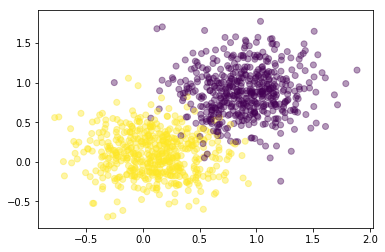

In [50]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

This is an "easy" dataset both because it is 2-dimensional and because it is **linearly separable**. This means we can draw a line to separate the two classes. Let's do that manually just for fun.

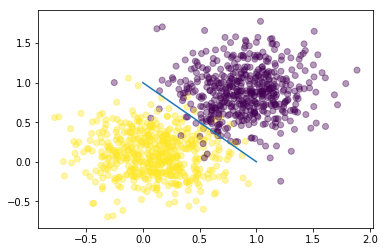

In [51]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)
plt.plot([0, 1], [1, 0])

Now let's build a model to do this classification for us.

## Basics of modeling with Keras

[Keras](https://www.keras.io) is a simple neural net library. It helps you quickly define the structure of a network without having to write a lot of code.

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Keras gives you some flexible building blocks to build up your model. The `Sequence` model class is a simple container for a series of "layers" that process the input data in order. After creating a `Sequential` model...

In [71]:
model0 = Sequential()

... we can add layers to it one by one. For our first model we will use two layer types: `Dense` and `Activation`.

A [`Dense` layer](https://keras.io/layers/core/#dense) (also known as a **fully-connected** layer) consists of weights  and biases. An [`Activation` layer](https://keras.io/layers/core/#activation) applies a non-linear **activation function** on its input. We will make a "shallow" model for now: a fully-connected layer followed by a softmax activation.

In [72]:
model0.add(Dense(2, input_dim=2))
model0.add(Activation('softmax'))

## Optimizer

For any application of deep learning, four things come together in the solution:

> complete model = data + graph + loss + optimizer

We have seen what our data looks like and we have specified the strucure of our model. Now we will specify a [loss](https://keras.io/objectives/) ([**cross entropy**](https://en.wikipedia.org/wiki/Cross_entropy)) and an optimizer (regular **stochatic gradient descent**). We also tell Keras to keep track of the accuracy during training.

In [73]:
from keras.optimizers import SGD

model0.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.04),
               metrics=['accuracy'])

## Visualizing the model
We can view the structure of the model with the handy `summary` method.

In [56]:
model0.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_6 (Dense)                  (None, 2)             6           dense_input_5[0][0]              
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 2)             0           dense_6[0][0]                    
Total params: 6
Trainable params: 6
Non-trainable params: 0
____________________________________________________________________________________________________


Keras models process multiple input examples at a time in a batch. A shape of `(None, 2)` tells us that the number of examples is not fixed (the first dimension) and each example has 2 dimensions.

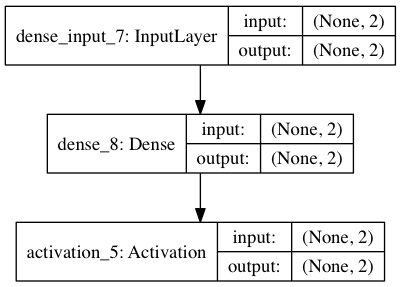

In [74]:
from IPython.display import Image
from keras.utils.visualize_util import model_to_dot

Image(model_to_dot(model0, show_shapes=True).create(prog='dot', format='png'))

## Training the model
Let's generate a train/test split of our data. Our model learns from the **training** data, and we reserve **test** data for testing the performance of our model after it is trained.

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [216]:
_ = model0.fit(X_train, y_train, nb_epoch=200, batch_size=16, verbose=0)

In [217]:
result = model0.evaluate(X_test, y_test, verbose=0)
print 'Test set loss: ', result[0]
print 'Test set accuracy: ', result[1]

Test set loss:  0.0753386437893
Test set accuracy:  0.971999997139


## Decision Boundary

In [218]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ[:,0] >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

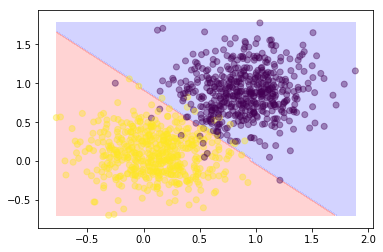

In [219]:
plot_decision_boundary(model0, X, y)

Congratulations! You trained your first model with Keras!

## A more compact syntax

Because it is so common to follow a full-connected layer with an activation function when building models, Keras allows you to specify the activation function when a `Dense` layer is created by using the keyword argument `activation`. Refer to documentation for the `Dense` layer type [here](https://keras.io/layers/core/).

In [220]:
model1 = Sequential()
model1.add(Dense(2, input_dim=2, activation='softmax')) # It's the same achitecture as model 0

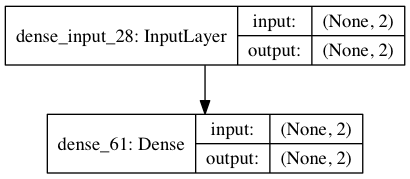

In [221]:
from IPython.display import Image
from keras.utils.visualize_util import model_to_dot

Image(model_to_dot(model1, show_shapes=True).create(prog='dot', format='png'))

Let's compile and fit this model. 

In [222]:
from keras.optimizers import SGD

model1.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.04),
               metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, nb_epoch=200, batch_size=16, verbose=0)

In [223]:
result0 = model0.evaluate(X_test, y_test, verbose=0)
print ''
print 'Test set accuracy #1: ', result0[1]

result1 = model1.evaluate(X_test, y_test, verbose=0)
print ''
print 'Test set accuracy #2: ', result1[1]


Test set accuracy #1:  0.971999997139

Test set accuracy #2:  0.971999997139


## Check that the model is converging 

In [224]:
def plot_loss(hist, legend=None):
    loss = hist.history['loss']
    if legend is not None:
        line, = plt.plot(range(len(loss)), loss, label=legend)
        plt.legend(handles=[line])
    else:
        plt.plot(range(len(loss)), loss)
    plt.ylabel('Loss')
    plt.xlabel('Epoch #')

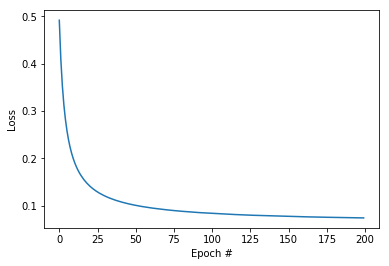

In [225]:
plot_loss(history1)

## Non-separable data

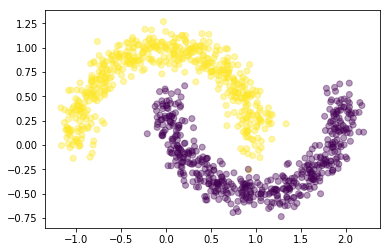

In [231]:
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=1000,
                 noise=0.1,
                 random_state=0)

y2 = np_utils.to_categorical(y2)
plt.scatter(X2[:,0], X2[:,1], c=y2[:,0], alpha=0.4)

In [232]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='softmax'))

In [233]:
from keras.optimizers import SGD

model2.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.04),
               metrics=['accuracy'])

In [234]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

In [235]:
history2 = model2.fit(X_train2, y_train2, nb_epoch=20, batch_size=16, verbose=0)

In [236]:
result = model2.evaluate(X_test2, y_test2, verbose=0)
print ''
print 'Test set loss: ', result[0]
print 'Test set accuracy: ', result[1]


Test set loss:  0.287737734199
Test set accuracy:  0.859999997616


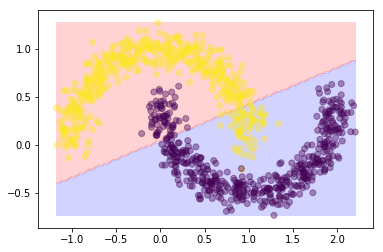

In [237]:
plot_decision_boundary(model2, X2, y2)

## Let's go deeper

The `Dense` constructor takes the output dimension as the first argument, in our case 2. Since this is the first layer in our model, we must also give it an `input_dim`, which is the dimension of our training data. 

Whenever we add more layers to our model, Keras knows what the input dimension will be by looking at the output dimension of the previous layer, so we can omit `input_dim` for later layers. The softmax activation doesn't ever change the dimension of the data, so it doesn't take an output dimension as an argument.

In [238]:
model3 = Sequential()
model3.add(Dense(10, input_dim=2, activation='relu'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(2, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

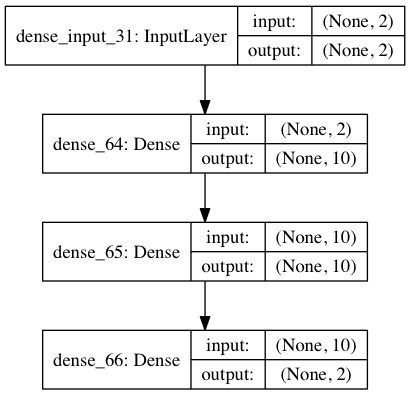

In [239]:
from IPython.display import Image
from keras.utils.visualize_util import model_to_dot

Image(model_to_dot(model3, show_shapes=True).create(prog='dot', format='png'))

In [241]:
history3 = model3.fit(X_train2, y_train2, nb_epoch=500, batch_size=32, verbose=0)

result = model2.evaluate(X_test2, y_test2, verbose=0)
print ''
print 'Test set loss #2: ', result[0]
print 'Test set accuracy #2: ', result[1]


result = model3.evaluate(X_test2, y_test2, verbose=0)
print ''
print 'Test set loss #3: ', result[0]
print 'Test set accuracy #3: ', result[1]


Test set loss #2:  0.287737734199
Test set accuracy #2:  0.859999997616

Test set loss #3:  0.00684160503931
Test set accuracy #3:  0.996


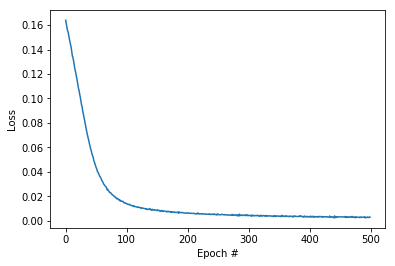

In [242]:
plot_loss(history3)

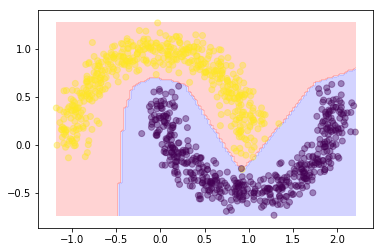

In [243]:
plot_decision_boundary(model3, X2, y2)

## Convolutional Neural Networks

In [295]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape

(60000, 28, 28)


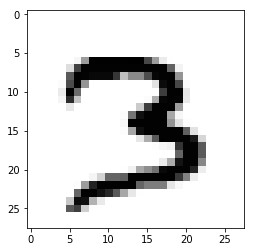

In [296]:
plt.imshow(X_train[np.random.randint(len(X_train))], cmap='Greys')

In [297]:
# 28 x 28 image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print 'X_train shape:', X_train.shape
print 'X_test shape:', X_test.shape

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [298]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print 'y_train shape:', y_train.shape
print 'y_test shape:', y_test.shape

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [312]:
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, Flatten

model = Sequential()

# 1st convolution layer with 10 output filters (3x3)
model.add(Convolution2D(10, 3, 3, border_mode='same', input_shape=(28, 28, 1)))  # tf ordering
model.add(MaxPooling2D())


# 2nd convolution layer with 32 output filters (3x3)
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(MaxPooling2D())

# Flatten CNN layers output
model.add(Flatten())

# Fully connected layers
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, validation_split=0.2,  nb_epoch=10, batch_size=32, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
16s - loss: 0.1744 - acc: 0.9489 - val_loss: 0.0861 - val_acc: 0.9730
Epoch 2/10
16s - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0542 - val_acc: 0.9848
Epoch 3/10
16s - loss: 0.0382 - acc: 0.9886 - val_loss: 0.0520 - val_acc: 0.9851
Epoch 4/10
17s - loss: 0.0271 - acc: 0.9918 - val_loss: 0.0549 - val_acc: 0.9870
Epoch 5/10
16s - loss: 0.0200 - acc: 0.9940 - val_loss: 0.0590 - val_acc: 0.9852
Epoch 6/10
16s - loss: 0.0163 - acc: 0.9950 - val_loss: 0.0576 - val_acc: 0.9877
Epoch 7/10
15s - loss: 0.0116 - acc: 0.9966 - val_loss: 0.0659 - val_acc: 0.9873
Epoch 8/10
16s - loss: 0.0085 - acc: 0.9972 - val_loss: 0.0677 - val_acc: 0.9868
Epoch 9/10
16s - loss: 0.0069 - acc: 0.9981 - val_loss: 0.0644 - val_acc: 0.9892
Epoch 10/10
16s - loss: 0.0056 - acc: 0.9984 - val_loss: 0.0693 - val_acc: 0.9886


In [314]:
result = model.evaluate(X_test, y_test, verbose=2)
print 'Test loss:', result[0]
print 'Test accuracy:', result[1] 

Test loss: 0.0676304435188
Test accuracy: 0.9882


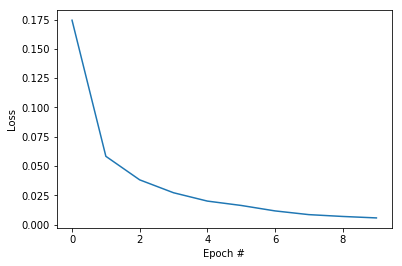

In [316]:
plot_loss(history)

## Confusion matrix

In [317]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5, 5), dpi=100)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

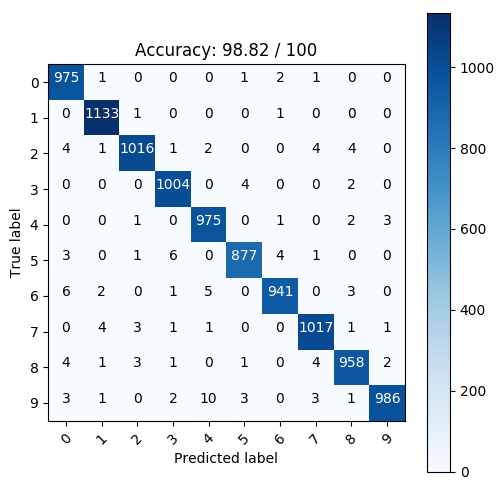

In [318]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(X_test, verbose=0)
y_true = np.argmax(y_test, axis=1) # it was one-hot encoded
cm = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm, range(10), title='Accuracy: %.2f / 100' % (result[1] * 100))

## Saving a trained model

Keras allows you to save and restore models. The model structure can be saved as JSON and the parameters as HDF5. Save your trained model for later:

In [319]:
with open('mnist_cnn.json', 'w') as f:
    f.write(model.to_json())

model.save_weights('mnist_cnn_weights.h5')

## Loading a model

In [320]:
from keras.models import model_from_json

# Load model structure
model = model_from_json(open('mnist_cnn.json').read())

# Load model weights
model.load_weights('mnist_cnn_weights.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Mapping data with tSNE

[tSNE](https://lvdmaaten.github.io/tsne/) is a commonly used visualization tool in deep learning. It is a dimensionality reduction technique: it takes high-dimensional data and maps them into a 2-dimensional space such that the relationships of the data is preserved. This low-dimensional mapping is called an "embedding".

In [321]:
from matplotlib import offsetbox


def plot_embedding(imgs, X, y, title=None, img_overlays=False):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    # Plot colors numbers
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        # plot colored number
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if img_overlays:
        if hasattr(offsetbox, 'AnnotationBbox'):
            # only print thumbnails with matplotlib > 1.0
            shown_images = np.array([[1., 1.]])  # just something big
            for i in range(X.shape[0]):
                dist = np.sum((X[i] - shown_images) ** 2, 1)
                if np.min(dist) < 4e-3:
                    # don't show points that are too close
                    continue
                shown_images = np.r_[shown_images, [X[i]]]
                imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(imgs[i], cmap=plt.cm.gray_r), X[i])
                ax.add_artist(imagebox)
        plt.xticks([]), plt.yticks([])
    plt.xlim([-0.5,1.5])
    plt.ylim([-0.5,1.5])

    if title is not None:
        plt.title(title)

tSNE takes a list of representations for each example data as input and outputs a 2-d location for that example. Below, we do this to the input data itself and plot the result.

In [325]:
# Select the data to embed - in this case the first 1000 training examples
# We reshape the data from its 28x28 size to a flat vector
num_emb = 1000
reps = X_train[:num_emb].reshape([num_emb, 28*28])
print reps.shape

(1000, 784)


In [326]:
# Fit our tSNE mapping to the `reps` data vectors
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000, method='exact')
emb = tsne.fit_transform(reps)

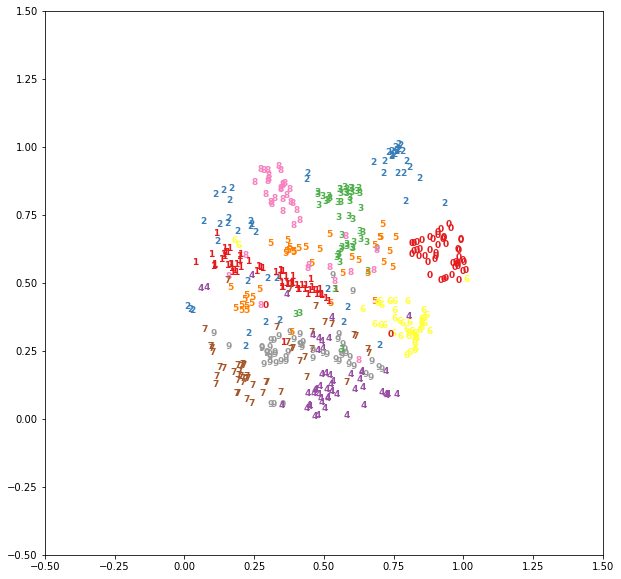

In [329]:
# To make the plot, we input the image data itself, the embedding data we fit with tSNE,
# and class labels for the the data points
num_plot = 500
y_labels = np.argmax(y_train, axis=1) # it was one-hot encoded
plot_embedding(np.squeeze(X_train[:num_plot]), emb[:num_plot], y_labels[:num_plot])

## Map the ouput of a layer

Let's extract the output of a layer in our network. Then let's create a tSNE embedding with this layer and plot it.

In [330]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 28, 28, 10)    100         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
maxpooling2d_11 (MaxPooling2D)   (None, 14, 14, 10)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 14, 14, 32)    2912        maxpooling2d_11[0][0]            
____________________________________________________________________________________________________
maxpooling2d_12 (MaxPooling2D)   (None, 7, 7, 32)      0           convolution2d_12[0][0]           
___________________________________________________________________________________________

In [341]:
from keras import backend as K

get_layer = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-2].output])
reps = get_layer([X_train[:num_emb], 0])[0] # Hidden layer output
print reps.shape

(1000, 100)


In [342]:
from sklearn.manifold import TSNE
# Create a tSNE plot with a deep fully-connected layer
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000, method='exact')
emb = tsne.fit_transform(reps)


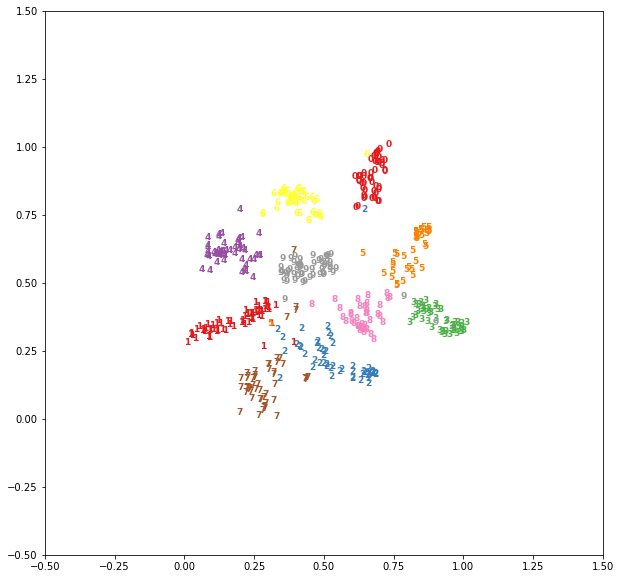

In [343]:
# To make the plot, we input the image data itself, the embedding data we fit with tSNE,
# and class labels for the the data points
num_plot = 500
y_labels = np.argmax(y_train, axis=1) # it was one-hot encoded
plot_embedding(np.squeeze(X_train[:num_plot]), emb[:num_plot], y_labels[:num_plot])